In [191]:
import pandas as pd
import numpy as np 
import bs4
import csv
import datetime
import matplotlib.pyplot as plt

In [216]:
#path
tweets_file_path="C:/Users/oshra/Desktop/tweets_metrics_2.csv"
users_file_path="C:/Users/oshra/Desktop/users_metrics.csv"

#משימה 1

In [193]:
#reading csv file
tweets=pd.read_csv(tweets_file_path,encoding='latin-1')
tweets

,user_id,tweet_id,text,created at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang
0,13679,1.320000e+18,@hassankhan Very likely! The pattern is usuall...,Wed Oct 28 06:09:25 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en
1,13679,1.330000e+18,"Over the past 8 months, HHS &amp; CDC has been...",Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en
2,13679,1.330000e+18,The Open Government Data Act signed into law b...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en
3,13679,1.330000e+18,I often get asked if there are any *legal* or ...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en
4,13679,1.330000e+18,My last plea. Before handing the baton to the ...,Tue Nov 17 19:02:10 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,True,6,en
...,...,...,...,...,...,...,...,...,...,...,...
77447,4924419310,1.000000e+18,RT @TheUndefeated: ?? @IvoryLatta12 and ...,Thu May 31 16:08:16 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,63,en
77448,4924419310,1.000000e+18,"RT @WNBA: These ""Power is Female"" Nike Kyrie 4...",Tue May 29 16:42:34 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,103,en
77449,4924419310,1.000000e+18,RT @kobebryant: Get em lil sis ??¾ #goldm...,Sat May 26 14:38:44 +0000 2018,"{""hashtags"": [{""text"": ""goldmamba"", ""indices"":...","[{""text"": ""goldmamba"", ""indices"": [34, 44]}]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,793,en
77450,4924419310,1.000000e+18,We got u @sarahksilverman! What size?? B our g...,Fri May 25 02:44:38 +0000 2018,"{""hashtags"": [{""text"": ""WNBA"", ""indices"": [55,...","[{""text"": ""WNBA"", ""indices"": [55, 60]}, {""text...","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,35,en


In [194]:
#Adding new column with num of Hashtags
tweets['hashtag_count']=tweets['hashtags'].apply(lambda x: len(str(x).split('}'))-1)
tweets['hashtag_count']

0        0
1        0
2        0
3        0
4        0
        ..
77447    0
77448    0
77449    1
77450    4
77451    0
Name: hashtag_count, Length: 77452, dtype: int64

In [195]:
#is_geo column 
tweets['shared_geo_location']=np.where(tweets['geo'].isna(),0,1)
tweets['shared_geo_location']

0        0
1        0
2        0
3        0
4        0
        ..
77447    0
77448    0
77449    0
77450    0
77451    0
Name: shared_geo_location, Length: 77452, dtype: int32

In [196]:
#adding device column
tweets['device']=np.where(tweets['source'].str.contains("Twitter Web Client"),"PC","Mobile")
tweets['device']

0        Mobile
1        Mobile
2        Mobile
3        Mobile
4        Mobile
          ...  
77447    Mobile
77448    Mobile
77449    Mobile
77450    Mobile
77451    Mobile
Name: device, Length: 77452, dtype: object

In [197]:
#counting num of words in each tweet
tweets['word_count']=tweets['text'].apply(lambda x: len(str(x).split()))
tweets['word_count']

0        19
1        21
2        23
3        21
4        22
         ..
77447    19
77448    14
77449     9
77450    23
77451    22
Name: word_count, Length: 77452, dtype: int64

In [198]:
#Export to CSV
tweets.to_csv('tweets.csv', encoding='utf-8-sig')
tweets

,user_id,tweet_id,text,created at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang,hashtag_count,shared_geo_location,device,word_count
0,13679,1.320000e+18,@hassankhan Very likely! The pattern is usuall...,Wed Oct 28 06:09:25 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,19
1,13679,1.330000e+18,"Over the past 8 months, HHS &amp; CDC has been...",Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,21
2,13679,1.330000e+18,The Open Government Data Act signed into law b...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,23
3,13679,1.330000e+18,I often get asked if there are any *legal* or ...,Tue Nov 17 18:44:07 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,21
4,13679,1.330000e+18,My last plea. Before handing the baton to the ...,Tue Nov 17 19:02:10 +0000 2020,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,True,6,en,0,0,Mobile,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77447,4924419310,1.000000e+18,RT @TheUndefeated: ?? @IvoryLatta12 and ...,Thu May 31 16:08:16 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,63,en,0,0,Mobile,19
77448,4924419310,1.000000e+18,"RT @WNBA: These ""Power is Female"" Nike Kyrie 4...",Tue May 29 16:42:34 +0000 2018,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,103,en,0,0,Mobile,14
77449,4924419310,1.000000e+18,RT @kobebryant: Get em lil sis ??¾ #goldm...,Sat May 26 14:38:44 +0000 2018,"{""hashtags"": [{""text"": ""goldmamba"", ""indices"":...","[{""text"": ""goldmamba"", ""indices"": [34, 44]}]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,793,en,1,0,Mobile,9
77450,4924419310,1.000000e+18,We got u @sarahksilverman! What size?? B our g...,Fri May 25 02:44:38 +0000 2018,"{""hashtags"": [{""text"": ""WNBA"", ""indices"": [55,...","[{""text"": ""WNBA"", ""indices"": [55, 60]}, {""text...","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,35,en,4,0,Mobile,23


#משימה 2



In [217]:
#reading users file
users= pd.read_csv(users_file_path,encoding='latin-1')
users

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count
0,455531480,New Backyard,NewBackyard,NaN,"Smart, stylish technology and design. Current ...","{""url"": {""urls"": [{""url"": ""https://t.co/iZcaoX...",0,3031,4730,82,663,1,1043,0,1,7
1,1322535270,Hamryandhy,AndhyNautika,Jakarta,Tdk yg lebih bagus selain menjdi dri sndiri,"{""description"": {""urls"": []}}",0,20,41,0,3,0,49,1,1,8
2,2871787893,The Big Informer,Selfiebuzz,"Arizona, USA",Keeping The Public Up To Date With Today's Tec...,"{""url"": {""urls"": [{""url"": ""https://t.co/FTIi1Z...",0,66799,64870,65,763,0,171,1,1,16
3,701561502,Abby Pena,AbbyPena5,"Lake Jackson, Tx",Idk how too use this lol .,"{""url"": {""urls"": [{""url"": ""http://t.co/OHKIaVw...",0,33,53,0,0,0,1,1,1,7
4,321589427,Stephen Walt,stephenWalt,"Brookline, MA","Professor of International Affairs, Harvard Ke...","{""description"": {""urls"": []}}",0,70804,588,1361,2387,0,8934,1,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2634686733,Alex Wilson,alexsexybish,NaN,cheer star!â­ï¸,"{""description"": {""urls"": []}}",0,43,21,0,30,0,51,0,1,2
594,566826696,Noam Levy,NoamLevy,Israel,NaN,"{""description"": {""urls"": []}}",0,37,22,0,33,0,6,1,1,1
595,1445627036,Setiawan juventini,EkhaJuventini,"Semarang, asal garut","Trust me I'm a juventini, born october 15 1992...","{""description"": {""urls"": []}}",0,9,50,0,16,0,397,1,1,18
596,141711645,Abel Pintos,AbelPintos,Argentina,* EL HECHIZO * Nueva canciÃ³n / mis canciones ...,"{""url"": {""urls"": [{""url"": ""https://t.co/LiedIe...",0,1716012,166,1369,539,0,21972,1,1,15


In [218]:
#counting num of words in description
desc_len=users['description'].apply(lambda x: len(str(x).split()))
users['Num_words_in_desc']=np.where(users['description'].isna() ,0, desc_len)
users['Num_words_in_desc']

0       7
1       8
2      16
3       7
4      22
       ..
593     2
594     0
595    18
596    15
597    15
Name: Num_words_in_desc, Length: 598, dtype: int64

In [219]:
#Is Celeb column
users['is_celeb']=np.where(users['followers_count']>100000 ,'Yes','No')
users['is_celeb']

0       No
1       No
2       No
3       No
4       No
      ... 
593     No
594     No
595     No
596    Yes
597     No
Name: is_celeb, Length: 598, dtype: object

In [220]:
#counting num of tweets by user_id
users['Collected_tweets']=users['user_id'].map(tweets['user_id'].value_counts())
users['Collected_tweets']

0       64
1        8
2      136
3        2
4      392
      ... 
593     84
594     10
595     14
596      2
597    400
Name: Collected_tweets, Length: 598, dtype: int64

In [221]:
#Precentage of Collected tweets from Total Tweets
users['percent_tweets_Collected']=round((users['Collected_tweets']/users['statuses_count'])*100,2)
users

,user_id,name,screen_name,location,description,entities,protected,followers_count,friends_count,listed_count,favourites_count,geo_enabled,statuses_count,shared_location,shared_profile_picture,desc_words_Count,Num_words_in_desc,is_celeb,Collected_tweets,percent_tweets_Collected
0,455531480,New Backyard,NewBackyard,NaN,"Smart, stylish technology and design. Current ...","{""url"": {""urls"": [{""url"": ""https://t.co/iZcaoX...",0,3031,4730,82,663,1,1043,0,1,7,7,No,64,6.14
1,1322535270,Hamryandhy,AndhyNautika,Jakarta,Tdk yg lebih bagus selain menjdi dri sndiri,"{""description"": {""urls"": []}}",0,20,41,0,3,0,49,1,1,8,8,No,8,16.33
2,2871787893,The Big Informer,Selfiebuzz,"Arizona, USA",Keeping The Public Up To Date With Today's Tec...,"{""url"": {""urls"": [{""url"": ""https://t.co/FTIi1Z...",0,66799,64870,65,763,0,171,1,1,16,16,No,136,79.53
3,701561502,Abby Pena,AbbyPena5,"Lake Jackson, Tx",Idk how too use this lol .,"{""url"": {""urls"": [{""url"": ""http://t.co/OHKIaVw...",0,33,53,0,0,0,1,1,1,7,7,No,2,200.00
4,321589427,Stephen Walt,stephenWalt,"Brookline, MA","Professor of International Affairs, Harvard Ke...","{""description"": {""urls"": []}}",0,70804,588,1361,2387,0,8934,1,1,22,22,No,392,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,2634686733,Alex Wilson,alexsexybish,NaN,cheer star!â­ï¸,"{""description"": {""urls"": []}}",0,43,21,0,30,0,51,0,1,2,2,No,84,164.71
594,566826696,Noam Levy,NoamLevy,Israel,NaN,"{""description"": {""urls"": []}}",0,37,22,0,33,0,6,1,1,1,0,No,10,166.67
595,1445627036,Setiawan juventini,EkhaJuventini,"Semarang, asal garut","Trust me I'm a juventini, born october 15 1992...","{""description"": {""urls"": []}}",0,9,50,0,16,0,397,1,1,18,18,No,14,3.53
596,141711645,Abel Pintos,AbelPintos,Argentina,* EL HECHIZO * Nueva canciÃ³n / mis canciones ...,"{""url"": {""urls"": [{""url"": ""https://t.co/LiedIe...",0,1716012,166,1369,539,0,21972,1,1,15,15,Yes,2,0.01


In [222]:
#Export to CSV
users.to_csv('users.csv', encoding='utf-8-sig')

##משימה 3

In [202]:
#copy the tweets data frame and filter the tweets without date and change the type of the column by using the func "datetime"
filter_tweets=tweets.copy()
filter_tweets=filter_tweets.iloc[np.where(filter_tweets['created at']!= '-')]
filter_tweets['created at']=filter_tweets['created at'].apply(lambda x: datetime.datetime.strptime(x,"%a %b %d %H:%M:%S %z %Y"))
filter_tweets

,user_id,tweet_id,text,created at,entities,hashtags,source,geo,is_quote_status,retweet_count,lang,hashtag_count,shared_geo_location,device,word_count
0,13679,1.320000e+18,@hassankhan Very likely! The pattern is usuall...,2020-10-28 06:09:25+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,19
1,13679,1.330000e+18,"Over the past 8 months, HHS &amp; CDC has been...",2020-11-17 18:44:07+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,21
2,13679,1.330000e+18,The Open Government Data Act signed into law b...,2020-11-17 18:44:07+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,23
3,13679,1.330000e+18,I often get asked if there are any *legal* or ...,2020-11-17 18:44:07+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,False,0,en,0,0,Mobile,21
4,13679,1.330000e+18,My last plea. Before handing the baton to the ...,2020-11-17 19:02:10+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,True,6,en,0,0,Mobile,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77447,4924419310,1.000000e+18,RT @TheUndefeated: ?? @IvoryLatta12 and ...,2018-05-31 16:08:16+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,63,en,0,0,Mobile,19
77448,4924419310,1.000000e+18,"RT @WNBA: These ""Power is Female"" Nike Kyrie 4...",2018-05-29 16:42:34+00:00,"{""hashtags"": [], ""symbols"": [], ""user_mentions...",[],"<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,False,103,en,0,0,Mobile,14
77449,4924419310,1.000000e+18,RT @kobebryant: Get em lil sis ??¾ #goldm...,2018-05-26 14:38:44+00:00,"{""hashtags"": [{""text"": ""goldmamba"", ""indices"":...","[{""text"": ""goldmamba"", ""indices"": [34, 44]}]","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,793,en,1,0,Mobile,9
77450,4924419310,1.000000e+18,We got u @sarahksilverman! What size?? B our g...,2018-05-25 02:44:38+00:00,"{""hashtags"": [{""text"": ""WNBA"", ""indices"": [55,...","[{""text"": ""WNBA"", ""indices"": [55, 60]}, {""text...","<a href=""http://www.hootsuite.com"" rel=""nofoll...",NaN,True,35,en,4,0,Mobile,23


In [224]:
#create the columns 'Year' and 'Month'
filter_tweets['Year']=filter_tweets['created at'].apply(lambda x: x.year)
filter_tweets['Month']=filter_tweets['created at'].apply(lambda x: x.month)
filter_tweets[['Year','Month']]

,Year,Month
0,2020,10
1,2020,11
2,2020,11
3,2020,11
4,2020,11
...,...,...
77447,2018,5
77448,2018,5
77449,2018,5
77450,2018,5


In [226]:
#create the columns 'Tweet_count', 'Hashtag_count', 'Precent_mobile', 'Retweet_count',
# 'Location_sharing_count', 'Quote_count' by using aggrigation
data=filter_tweets.groupby(['user_id','Year','Month']).agg(
    Tweet_count=('tweet_id','count'),
    Hashtag_count=('hashtag_count','sum'),
    Precent_mobile=('device',lambda x: (list(x).count('Mobile')/len(list(x)))*100),
    Retweet_count=('retweet_count','sum'),
    Location_sharing_count=('shared_geo_location','sum'),
    Quote_count=('is_quote_status', lambda x: sum(list(x))),     
).reset_index()
data

,user_id,Year,Month,Tweet_count,Hashtag_count,Precent_mobile,Retweet_count,Location_sharing_count,Quote_count
0,13679,2020,8,74,0,100.000000,8262,0,8
1,13679,2020,9,88,8,100.000000,1658,0,30
2,13679,2020,10,114,4,100.000000,4114,0,30
3,13679,2020,11,110,2,100.000000,3140,0,20
4,1599171,2020,12,354,20,100.000000,517436,0,76
...,...,...,...,...,...,...,...,...,...
2441,4924419310,2018,10,2,0,0.000000,52,0,0
2442,4924419310,2018,11,46,14,21.739130,1340,0,10
2443,4924419310,2018,12,44,16,40.909091,4558,0,8
2444,4924419310,2019,1,56,28,50.000000,6740,0,12


In [227]:
#Precentage the tweets of each user for ech month
total_tweets=data['user_id'].map(filter_tweets['user_id'].value_counts())
data['precent_monthly']=(data['Tweet_count']/total_tweets)*100

In [228]:
#create a new data frame "tweets_monthly_summary"
tweets_monthly_summary=pd.DataFrame(data)
tweets_monthly_summary

,user_id,Year,Month,Tweet_count,Hashtag_count,Precent_mobile,Retweet_count,Location_sharing_count,Quote_count,precent_monthly
0,13679,2020,8,74,0,100.000000,8262,0,8,19.170984
1,13679,2020,9,88,8,100.000000,1658,0,30,22.797927
2,13679,2020,10,114,4,100.000000,4114,0,30,29.533679
3,13679,2020,11,110,2,100.000000,3140,0,20,28.497409
4,1599171,2020,12,354,20,100.000000,517436,0,76,100.000000
...,...,...,...,...,...,...,...,...,...,...
2441,4924419310,2018,10,2,0,0.000000,52,0,0,0.507614
2442,4924419310,2018,11,46,14,21.739130,1340,0,10,11.675127
2443,4924419310,2018,12,44,16,40.909091,4558,0,8,11.167513
2444,4924419310,2019,1,56,28,50.000000,6740,0,12,14.213198


In [229]:
#Export to CSV
tweets_monthly_summary.to_csv('tweets_monthly_summary.csv', encoding='utf-8-sig')

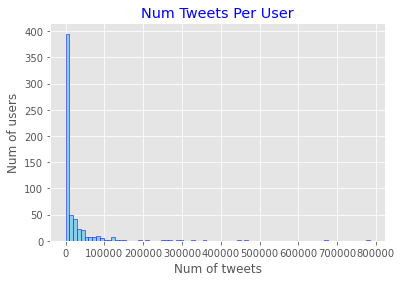

In [230]:
#plot that represents the number of tweets per user
plt.style.use('ggplot')
plt.hist([users['statuses_count']],80,color='skyblue',ec='blue')
plt.title('Num Tweets Per User',color='blue')
plt.xlabel('Num of tweets')
plt.ylabel('Num of users')
plt.show()

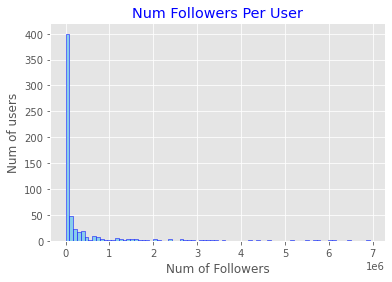

In [231]:
#plot that represents the number of followers per user
plt.style.use('ggplot')
plt.hist([users['followers_count']],bins=80,color='skyblue',ec='blue')
plt.title('Num Followers Per User',color='blue')
plt.xlabel('Num of Followers')
plt.ylabel('Num of users')
plt.show()

In [232]:
#take the last 10 users with the largest number of followers
x=users['followers_count'].nlargest(10)
y=users['name'][x.index]
top10= x.to_frame().join(y)
top10

,followers_count,name
189,6937466,ABS-CBN News
331,6421604,Posty
267,6104935,SelecciÃ³n Nacional
584,6015330,Maine Mendoza
299,5728110,GMA News
362,5649515,Facts
117,5546663,SENYORA
64,5146847,Ezequiel Lavezzi
353,4661361,Khalid
473,4411957,billie eilish


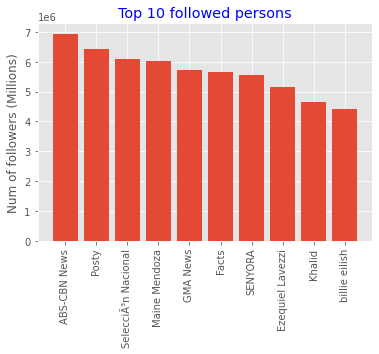

In [233]:
#plot that represents the names and the followers num of the most popular users
plt.bar(top10['name'],top10['followers_count'])
plt.xticks(rotation=90)
plt.title('Top 10 followed persons',color='blue')
plt.ylabel('Num of followers (Millions)')
plt.show()

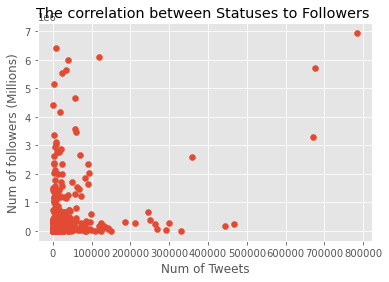

In [234]:
#plot that represents the correlation between number of statuses to number of followers 
plt.scatter(x=users['statuses_count'],y=users['followers_count'])
plt.title('The correlation between Statuses to Followers ',color='black')
plt.ylabel('Num of followers (Millions)')
plt.xlabel('Num of Tweets')
plt.show()

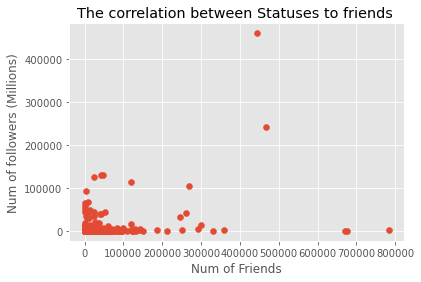

In [235]:
#plot that represents the correlation between number of statuses to number of friends 
plt.scatter(x=users['statuses_count'],y=users['friends_count'])
plt.title('The correlation between Statuses to friends ',color='black')
plt.ylabel('Num of followers (Millions)')
plt.xlabel('Num of Friends')
plt.show()